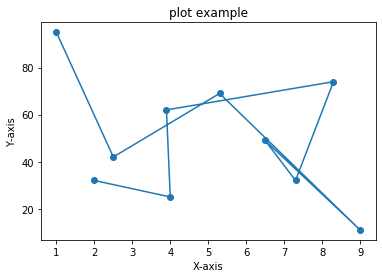

In [4]:
import matplotlib.pyplot as plt

x = [1, 2.5, 5.3, 9, 6.5, 7.3, 8.3, 3.9, 4, 2]
y = [95, 42, 69, 11, 49, 32, 74, 62,25,32]

plt.scatter(x,y)
plt.plot(x,y)
plt.title("plot example")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [38]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

In [39]:
#loading the boston dataset
boston = load_boston()
#print(boston)

In [40]:
#loading the dataset of boston to a pandas dataframe

features = pd.DataFrame(boston.data,columns=boston.feature_names)
#features

In [41]:
target = pd.DataFrame(boston.target,columns=['target'])
#target
target.to_csv (r'C:\Users\acer\target.csv', index = False, header=True)

In [43]:
df = pd.concat([features, target],axis=1)
#df

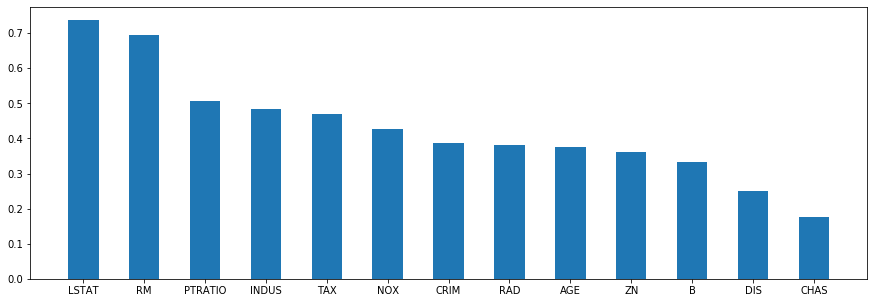

In [44]:
#finding the correlation between each feature and the target 
corr = df.corr('pearson')

#take absolute values of the correlation
corrs = [abs(corr[attr]['target']) for attr in list(features)]

#Make a list of pairs
l = list(zip(corrs,list(features)))

#sort the list of pairs in descending order
#sort with the key values as corrs
l.sort(key = lambda x: x[0], reverse = True)


corrs,labels = list(zip((*l)))

index = np.arange(len(labels))


plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xticks(index,labels)
plt.show()

In [18]:
#df['target']

In [45]:
#Now we prepare the data for normalizaation
#This is a data preprocessing step

X = df['LSTAT'].values
Y = df['target'].values

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[:,-1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[:,-1]

In [46]:
#defining error function
#we will use mean squared error function for our linear regression model

def error(m, x, c, t):
    N = x.size
    e = sum(((m*x+c)-t)**2)
    return e*1/(2*N)

In [47]:
#Splitting the data
#we define 0.2, to make 20% of the dataset to be taken for testing

xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size=0.2)

In [48]:
def update(m,x,c,t,learning_rate):
    grad_m = sum(2*((m*x+c)-t)*x)
    grad_c = sum(2*((m*x+c)-t))
    m = m-grad_m*learning_rate
    c = c-grad_c*learning_rate
    return m,c

In [49]:
def gradient_descend(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m,x,c,t)
        if e < error_threshold:
            print('Error less than threshold. Stopping gradient descend...')
            break
        error_values.append(e)
        m,c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

In [50]:
%%time
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001
m, c, error_values, mc_values = gradient_descend(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold)

Wall time: 106 ms


In [31]:
#m
#c
#error_values
#mc_values

In [51]:
#Here we will do the prediction

predicted = (m*xtest) + c

#Now we check the mean_squared_error for the predicted values
mean_squared_error(ytest,predicted)


#lets prepare a dataframe of predicted values,with targeted test values

p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted'])
p.head()

,x,target_y,predicted
0,0.692329,0.186667,0.096599
1,0.034492,0.600000,0.597969
2,0.305464,0.297778,0.391448
3,0.468819,0.226667,0.266947
4,0.399834,0.206667,0.319523


In [52]:
predicted = predicted.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(xtest)
predicted_scaled = y_scaler.inverse_transform(predicted)

#this is to remove the extra dimension
xtest_scaled = xtest_scaled[:,-1]
ytest_scaled = ytest_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]

p1 = pd.DataFrame(list(zip(xtest_scaled,xtest_scaled,predicted_scaled)),columns=['x','target_y','predicted'])
p1.head()

,x,target_y,predicted
0,26.82,26.82,9.346934
1,2.98,2.98,31.908606
2,12.80,12.80,22.615166
3,18.72,18.72,17.012603
4,16.22,16.22,19.378550


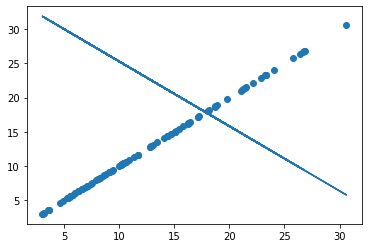

In [53]:
plt.scatter(p1['x'],p1['target_y'])
plt.plot(p1['x'],p1['predicted'])